# Homework 2
### Charles Yan, xy2985

### Q1 OLS

In [1]:
### Packages
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### (a)
### Let T = 5, N = 3
T, N = 5, 3
X = np.random.normal(0, 1, (T, N))

In [3]:
### Test
print(X)

[[-0.68485958  0.86633229  2.07773273]
 [ 0.64078567  1.15250221 -0.52706075]
 [-0.13267853  1.15888876 -0.18060655]
 [ 0.70016723 -0.68604037  1.09376324]
 [-0.32376693  0.06584944  1.59294847]]


In [4]:
### (b)
def linmodel(X, beta, std):
    if X.shape[1] != beta.shape[0]:
        print('Dimension Mismatch')
        return None
    residual = np.random.normal(0, std, X.shape[0])
    return X @ beta + residual

In [5]:
### Test
beta = np.random.normal(0, 1, (N, ))
std = 0.5
y = linmodel(X, beta, std)
print(y)

[-2.41750067 -0.12969932 -0.65421525 -1.45112325 -0.28793006]


In [6]:
### (c)
def fit(X, y):
    if X.shape[0] != y.shape[0]:
        print('Dimension Mismatch')
        return None
    return np.linalg.inv(X.T @ X) @ X.T @ y

In [7]:
### Test
print(fit(X, y))
### Compare
print(f'True parameter: beta\n{beta}')

[-0.58661523 -0.51799693 -0.90649377]
True parameter: beta
[-0.43295936 -0.36974658 -0.98665363]


In [8]:
### (d)
T, N = 1000, 3
X = np.random.normal(0, 1, (T, N))

std_list = [0.01, 0.1, 1]
beta = np.array([0.01, 0.1, 1])

for std in std_list:
    y = linmodel(X, beta, std)
    beta_hat = fit(X, y)
    print(f'Standard Devisation: {std};\nEstimated beta: {beta_hat}\n******************************')

Standard Devisation: 0.01;
Estimated beta: [0.01001952 0.09983212 0.99955954]
******************************
Standard Devisation: 0.1;
Estimated beta: [0.01153482 0.10525631 0.99655075]
******************************
Standard Devisation: 1;
Estimated beta: [-0.01209874  0.16979489  1.00400184]
******************************


In [9]:
### (e)
### See the scan of the clarification.

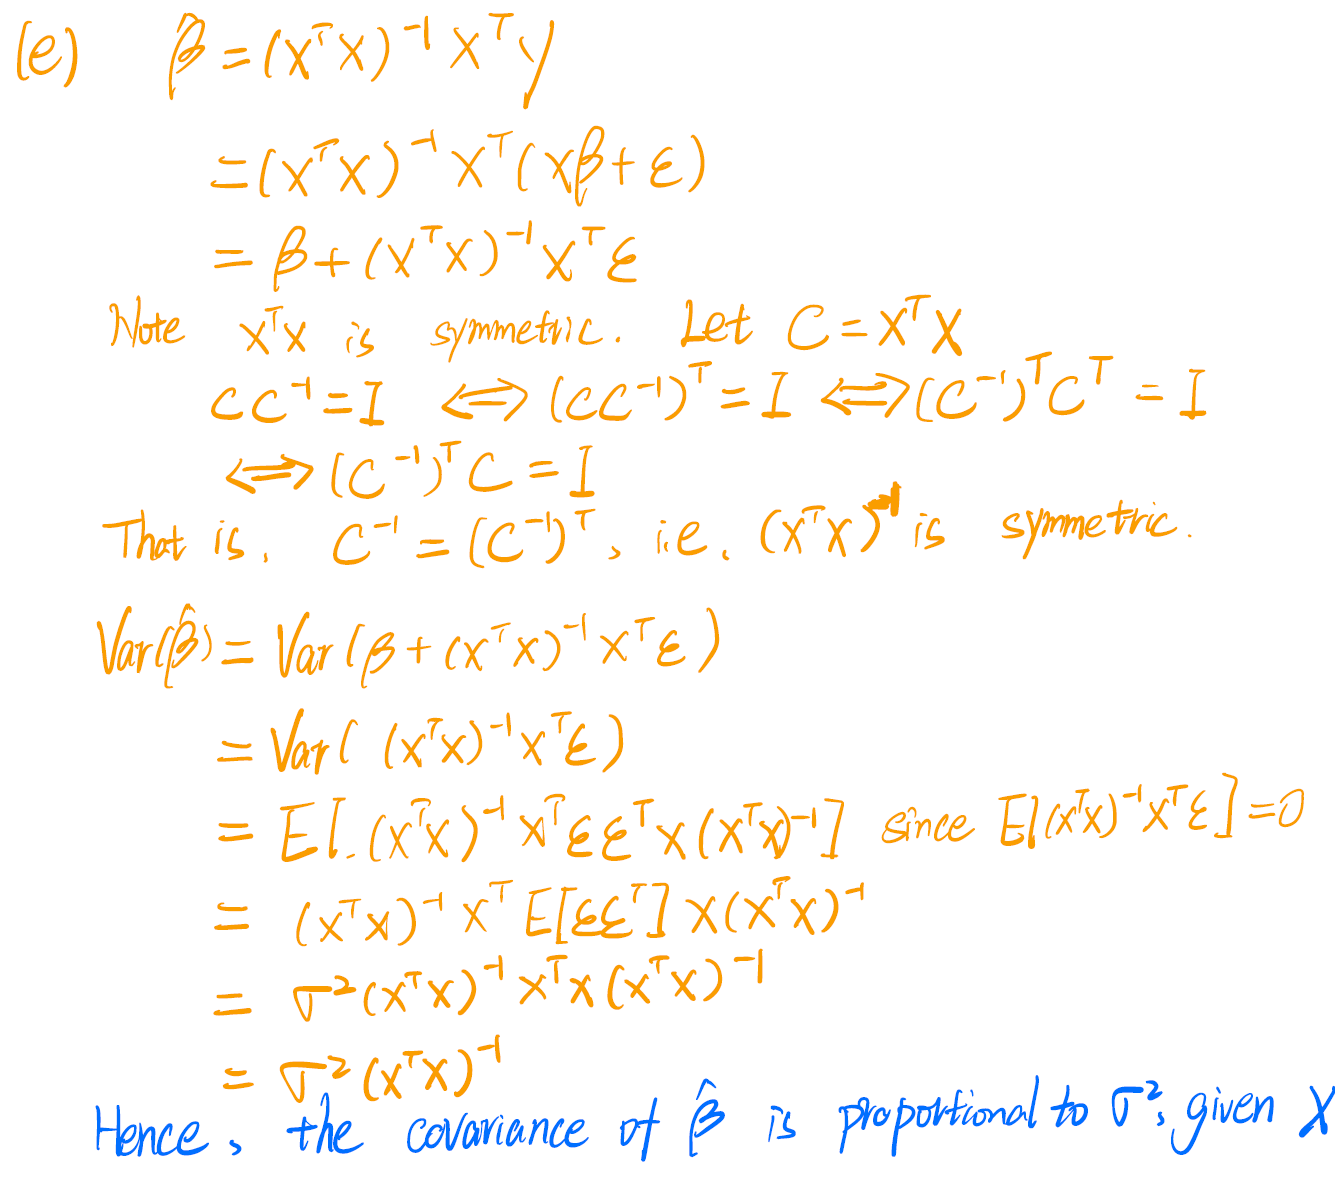

In [10]:
### (f)
K = 100
X = np.random.normal(0, 1, (T, N))

for std in std_list:
    beta_hat_list = []
    for _ in range(K):
        y = linmodel(X, beta, std)
        beta_hat = fit(X, y)
        beta_hat_list.append(beta_hat)
    beta_hat_list = np.array(beta_hat_list)
    print(f'Standard Devisation: {std};\nStandard Deviation of Estimated beta:\n{beta_hat_list.std(axis = 0)}\n******************************')


Standard Devisation: 0.01;
Standard Deviation of Estimated beta:
[0.00031685 0.00030063 0.00031122]
******************************
Standard Devisation: 0.1;
Standard Deviation of Estimated beta:
[0.00346114 0.00320805 0.003075  ]
******************************
Standard Devisation: 1;
Standard Deviation of Estimated beta:
[0.03267252 0.03174141 0.03347889]
******************************


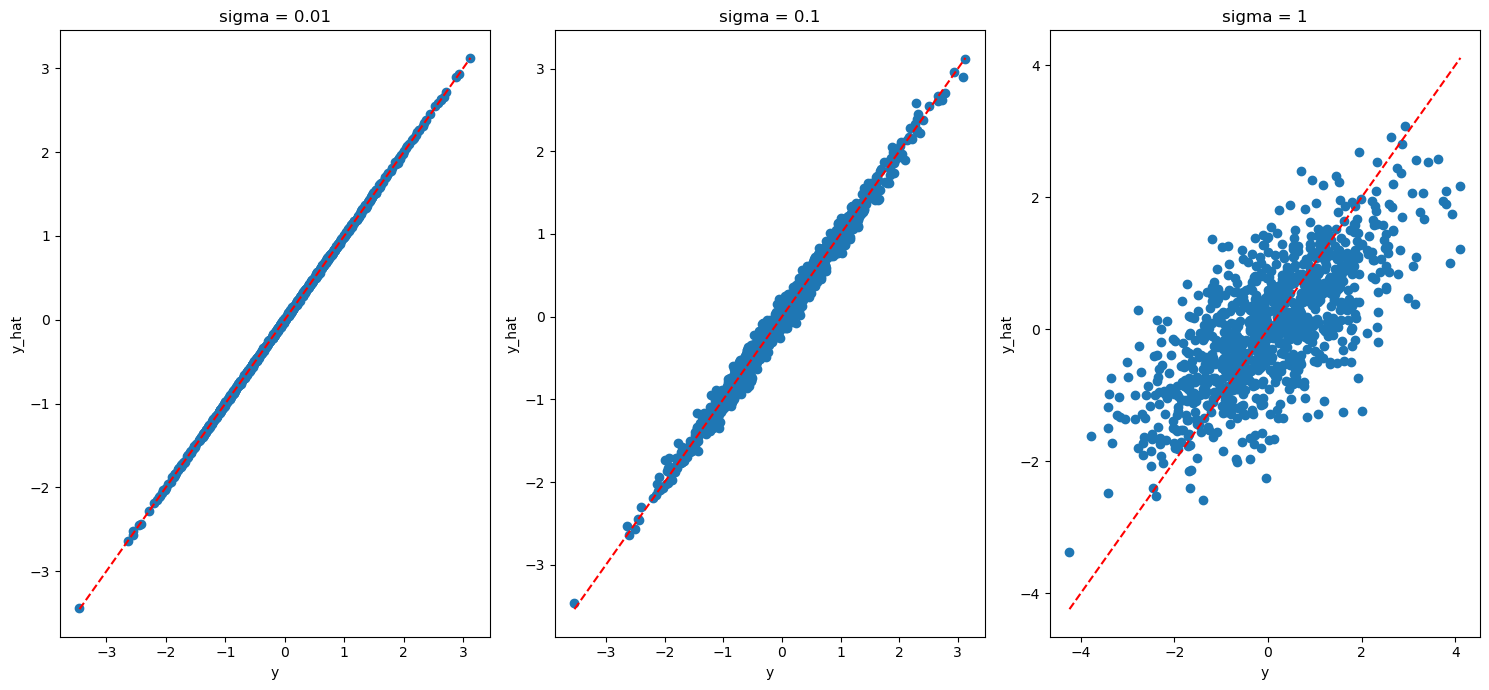

In [11]:
### (g)
fig, axes = plt.subplots(1, 3, figsize = (15, 7))

for i, std in enumerate(std_list):
    y = linmodel(X, beta, std)
    beta_hat = fit(X, y)
    y_hat = X @ beta_hat

    axes[i].scatter(y, y_hat)
    axes[i].plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    axes[i].set_xlabel('y')
    axes[i].set_ylabel('y_hat')
    axes[i].set_title(f'sigma = {std}')

plt.tight_layout()
plt.show()

##### Explanation
##### When $\sigma = 0.01$, the scatter points are falling along $y = \hat{y}$. As $\sigma$ increases, the scatter points gradually fall away from $y = \hat{y}$, since $y = X\beta + \epsilon$ is more influenced by $\epsilon$ with a larger $\sigma$, $\hat{y} = X\hat{\beta}$ cannot precisely reflect the behaviour of $y$.

In [12]:
### (h)
%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [ ]:
T, N = 1000, 3
X = np.random.normal(0, 1, (T, N))

def scatter(std, beta_1, beta_2, beta_3):
    if (beta_1 < 0 or beta_1 > 1) or (beta_2 < 0 or beta_2 > 1) or (beta_3 < 0 or beta_3 > 1):
        print('Beta values should be in [0, 1].')
        return
    

    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_axes([0.15, 0.15, 0.75, 0.75])

    beta = np.array([beta_1, beta_2, beta_3])
    y = linmodel(X, beta, std)
    beta_hat = fit(X, y)
    y_hat = X @ beta_hat

    ax.scatter(y, y_hat, alpha = 0.3, s = 10, c = 'steelblue')
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth = 2)
    ax.set_xlabel('y')
    ax.set_ylabel('y_hat')
    ax.set_title(f'std = {std:.2f}, beta = {np.round(beta, 2)}')

    plt.show()

    return beta_hat

w = widgets.interactive(scatter, std = (0.0, 1.0, 0.01), beta_1 = (0.0, 1.0, 0.01), beta_2 = (0.0, 1.0, 0.01), beta_3 = (0.0, 1.0, 0.01))
display(w)

interactive(children=(FloatSlider(value=0.5, description='std', max=1.0, step=0.01), FloatSlider(value=0.5, de…

### Q2 OLS in Geometry

##### (a) Proof
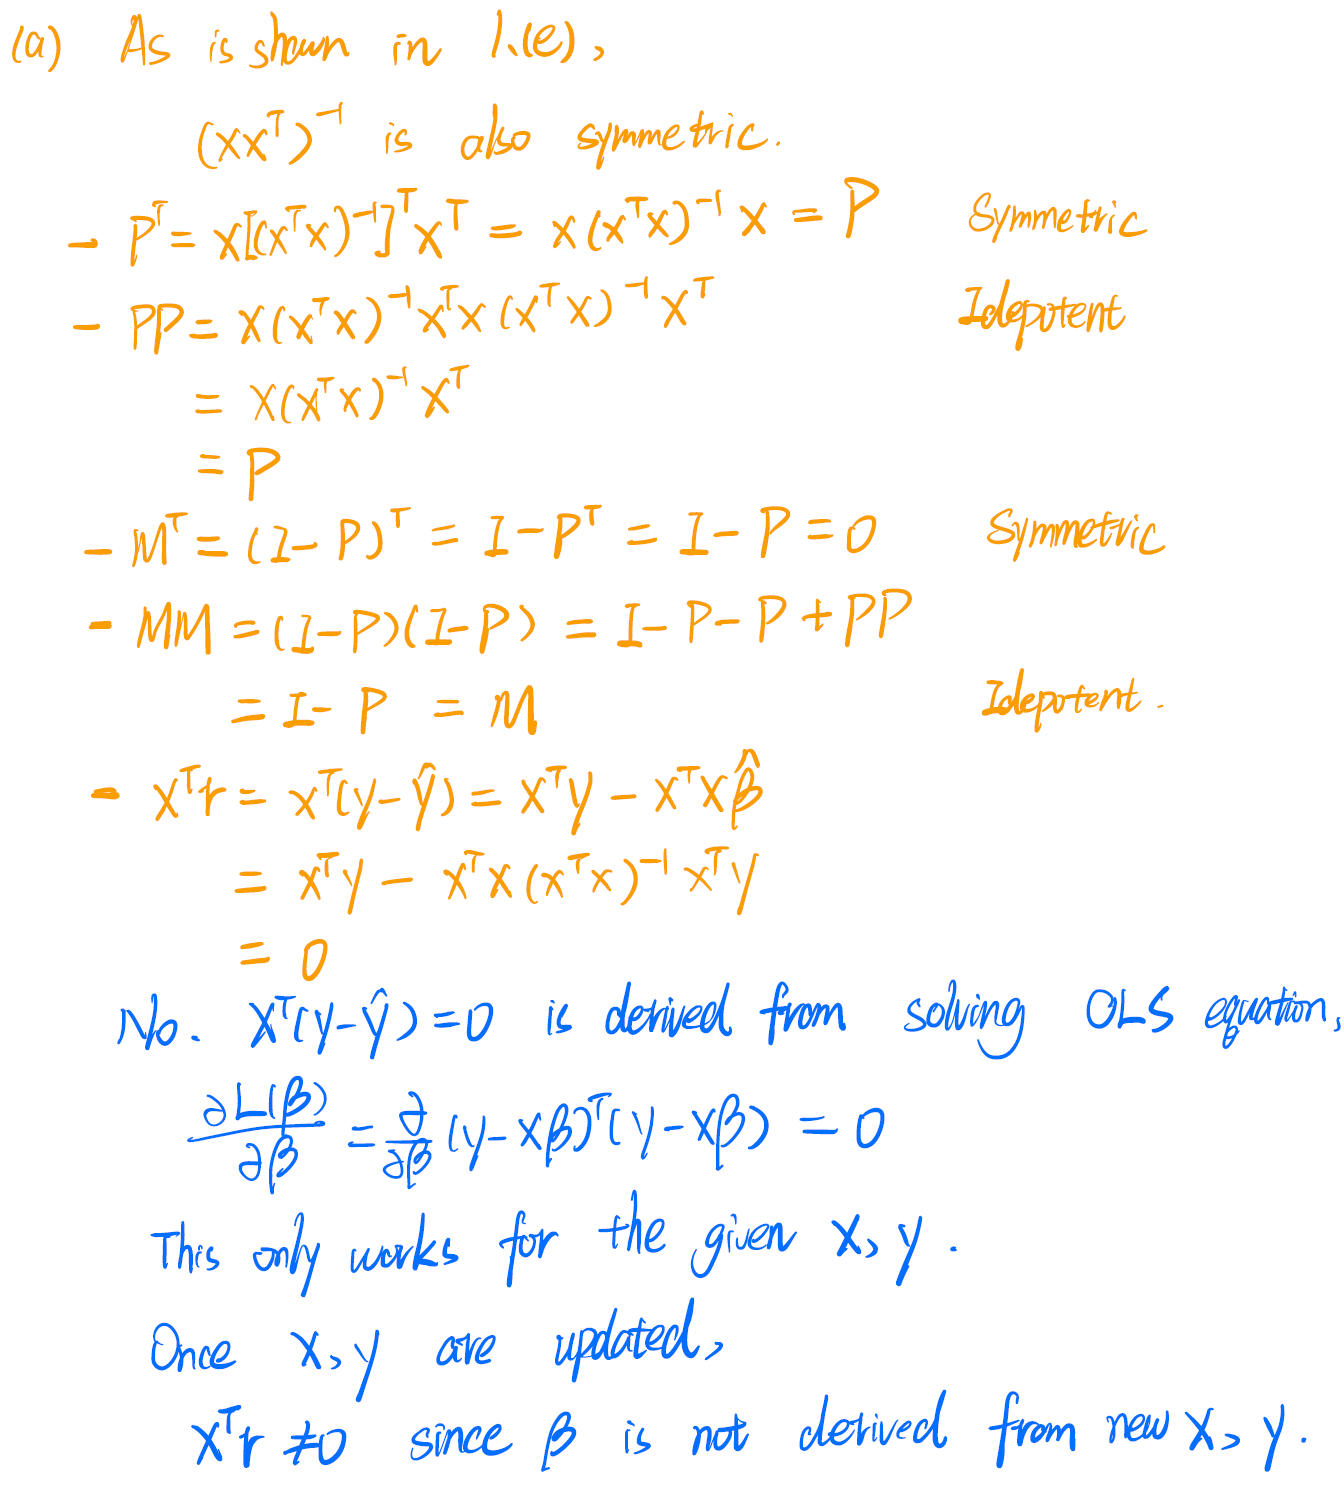

In [14]:
### (b)
import numpy as np

X = np.random.normal(0, 1, (T, N))

##### 1. By definition, $P = X(X^{\top}X)^{-1}X^{\top}$. We can construct such an equation, $X^{\top}XA = X^{\top}$. Thus, $np.linalg.solve(\cdot, \cdot)$ will compute $(X^{\top}X)^{-1}$ first and then multiply by $X^{\top}$ to solve the equation,
##### i.e. $A = (X^{\top}X)^{-1}X^{\top}$. Finally, compute $P$ by let $X$ multiply by A.

In [15]:
### (1)
A = np.linalg.solve(X.T @ X, X.T)
P = X @ A
M = np.eye(T) - P

### Test
print('=' * 45)
print('Projection Matrix P:\n', P)
print('=' * 45)
print('Annihilator Matrix M:\n', M)
print('=' * 45)

Projection Matrix P:
 [[ 0.00209379  0.00133755  0.00093303 ... -0.00204839 -0.00178817
  -0.00109327]
 [ 0.00133755  0.00146239  0.00078968 ... -0.0009019  -0.00264741
  -0.00144427]
 [ 0.00093303  0.00078968  0.00075877 ... -0.00062809 -0.00136658
  -0.00032571]
 ...
 [-0.00204839 -0.0009019  -0.00062809 ...  0.00236159  0.00069281
   0.00079077]
 [-0.00178817 -0.00264741 -0.00136658 ...  0.00069281  0.00528238
   0.00265211]
 [-0.00109327 -0.00144427 -0.00032571 ...  0.00079077  0.00265211
   0.00205196]]
Annihilator Matrix M:
 [[ 9.97906215e-01 -1.33755013e-03 -9.33025557e-04 ...  2.04838971e-03
   1.78816993e-03  1.09326567e-03]
 [-1.33755013e-03  9.98537607e-01 -7.89677239e-04 ...  9.01899585e-04
   2.64741415e-03  1.44426547e-03]
 [-9.33025557e-04 -7.89677239e-04  9.99241233e-01 ...  6.28088800e-04
   1.36658033e-03  3.25713653e-04]
 ...
 [ 2.04838971e-03  9.01899585e-04  6.28088800e-04 ...  9.97638412e-01
  -6.92811435e-04 -7.90772635e-04]
 [ 1.78816993e-03  2.64741415e-03  1.3

In [16]:
### (2)
def check_equality(A, B, tol = 1e-6):
    if A.shape != B.shape:
        print('Dimension Mismatch')
        return None
    maxAbs = np.max(np.abs(A - B))
    return  maxAbs <= tol, maxAbs
### Verify P = P^T 
P_Sym, maxAbs1 = check_equality(P, P.T)
### Verify P = PP
P_Ide, maxAbs2 = check_equality(P, P @ P)
### Verify M = MM
M_Ide, maxAbs3 = check_equality(M, M @ M)

### Test
print('=' * 45)
print(f'P = P^T: {P_Sym}; Max Absolute Deviation: {maxAbs1:.4e}')
print('=' * 45)
print(f'P = PP: {P_Ide}; Max Absolute Deviation: {maxAbs2:.4e}')
print('=' * 45)
print(f'M = MM: {M_Ide}; Max Absolute Deviation: {maxAbs3:.4e}')
print('=' * 45)


P = P^T: True; Max Absolute Deviation: 3.4694e-18
P = PP: True; Max Absolute Deviation: 2.7756e-17
M = MM: True; Max Absolute Deviation: 2.7756e-15


In [17]:
### (3)
y = np.random.normal(0, 1, T)
term = P.T @ (M @ y)

checkOutcome, maxAbs4 = check_equality(term, np.zeros(T))

### Test
print('=' * 45)
print(f'P^T(My) = 0: {checkOutcome}; Max Absolute Deviation: {maxAbs4:.4e}')
print('=' * 45)


P^T(My) = 0: True; Max Absolute Deviation: 3.0271e-16


In [18]:
### (4)
Y_Decomp, maxAbs5 = check_equality(P @ y + M @ y, y)

### Test
print('=' * 45)
print(f'y = Py + My: {Y_Decomp}; Max Absolute Deviation: {maxAbs5:.4e}')
print('=' * 45)

y = Py + My: True; Max Absolute Deviation: 4.4409e-15


### Q3 Unbiasedness of $s^{2}$ and degrees of freedom.

##### (a) Proof
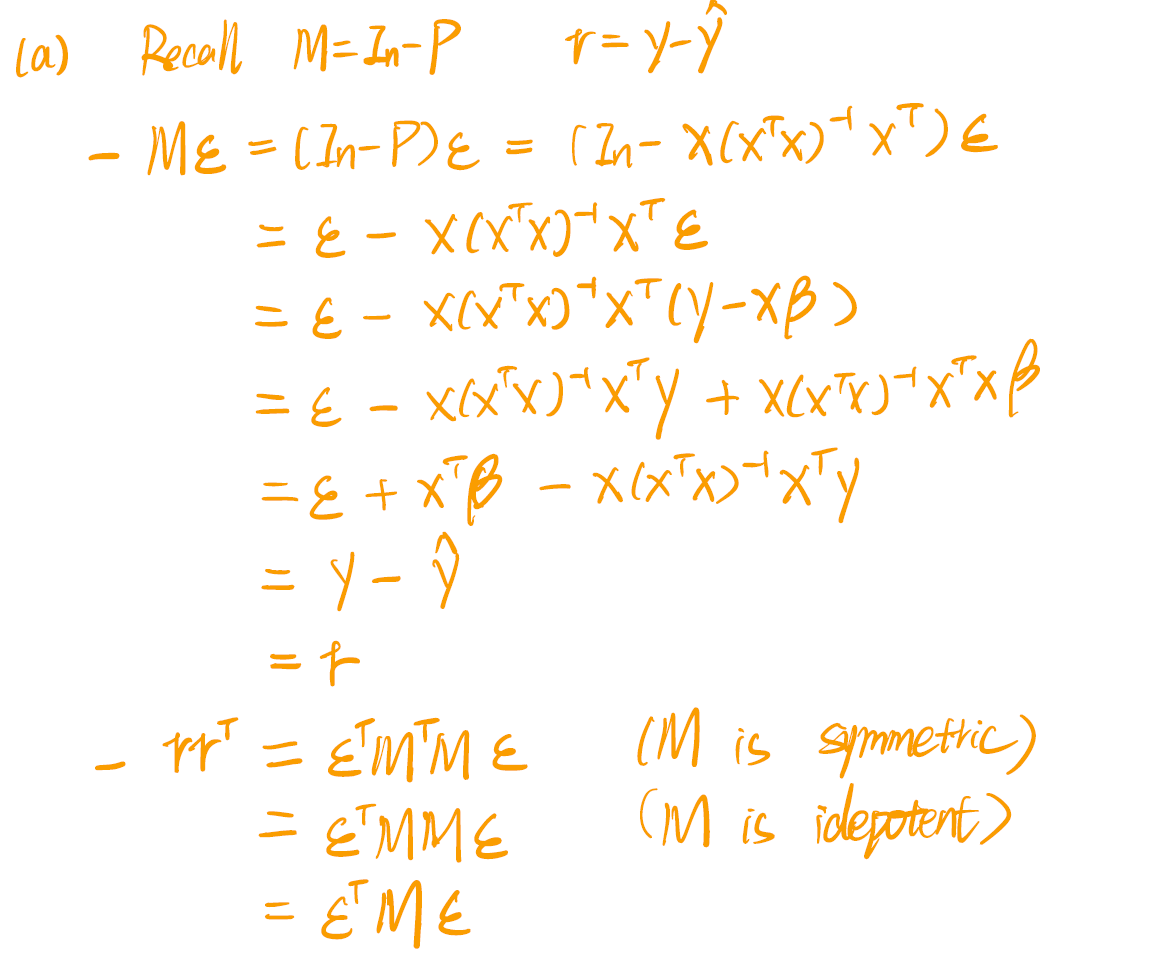

##### (b) Proof
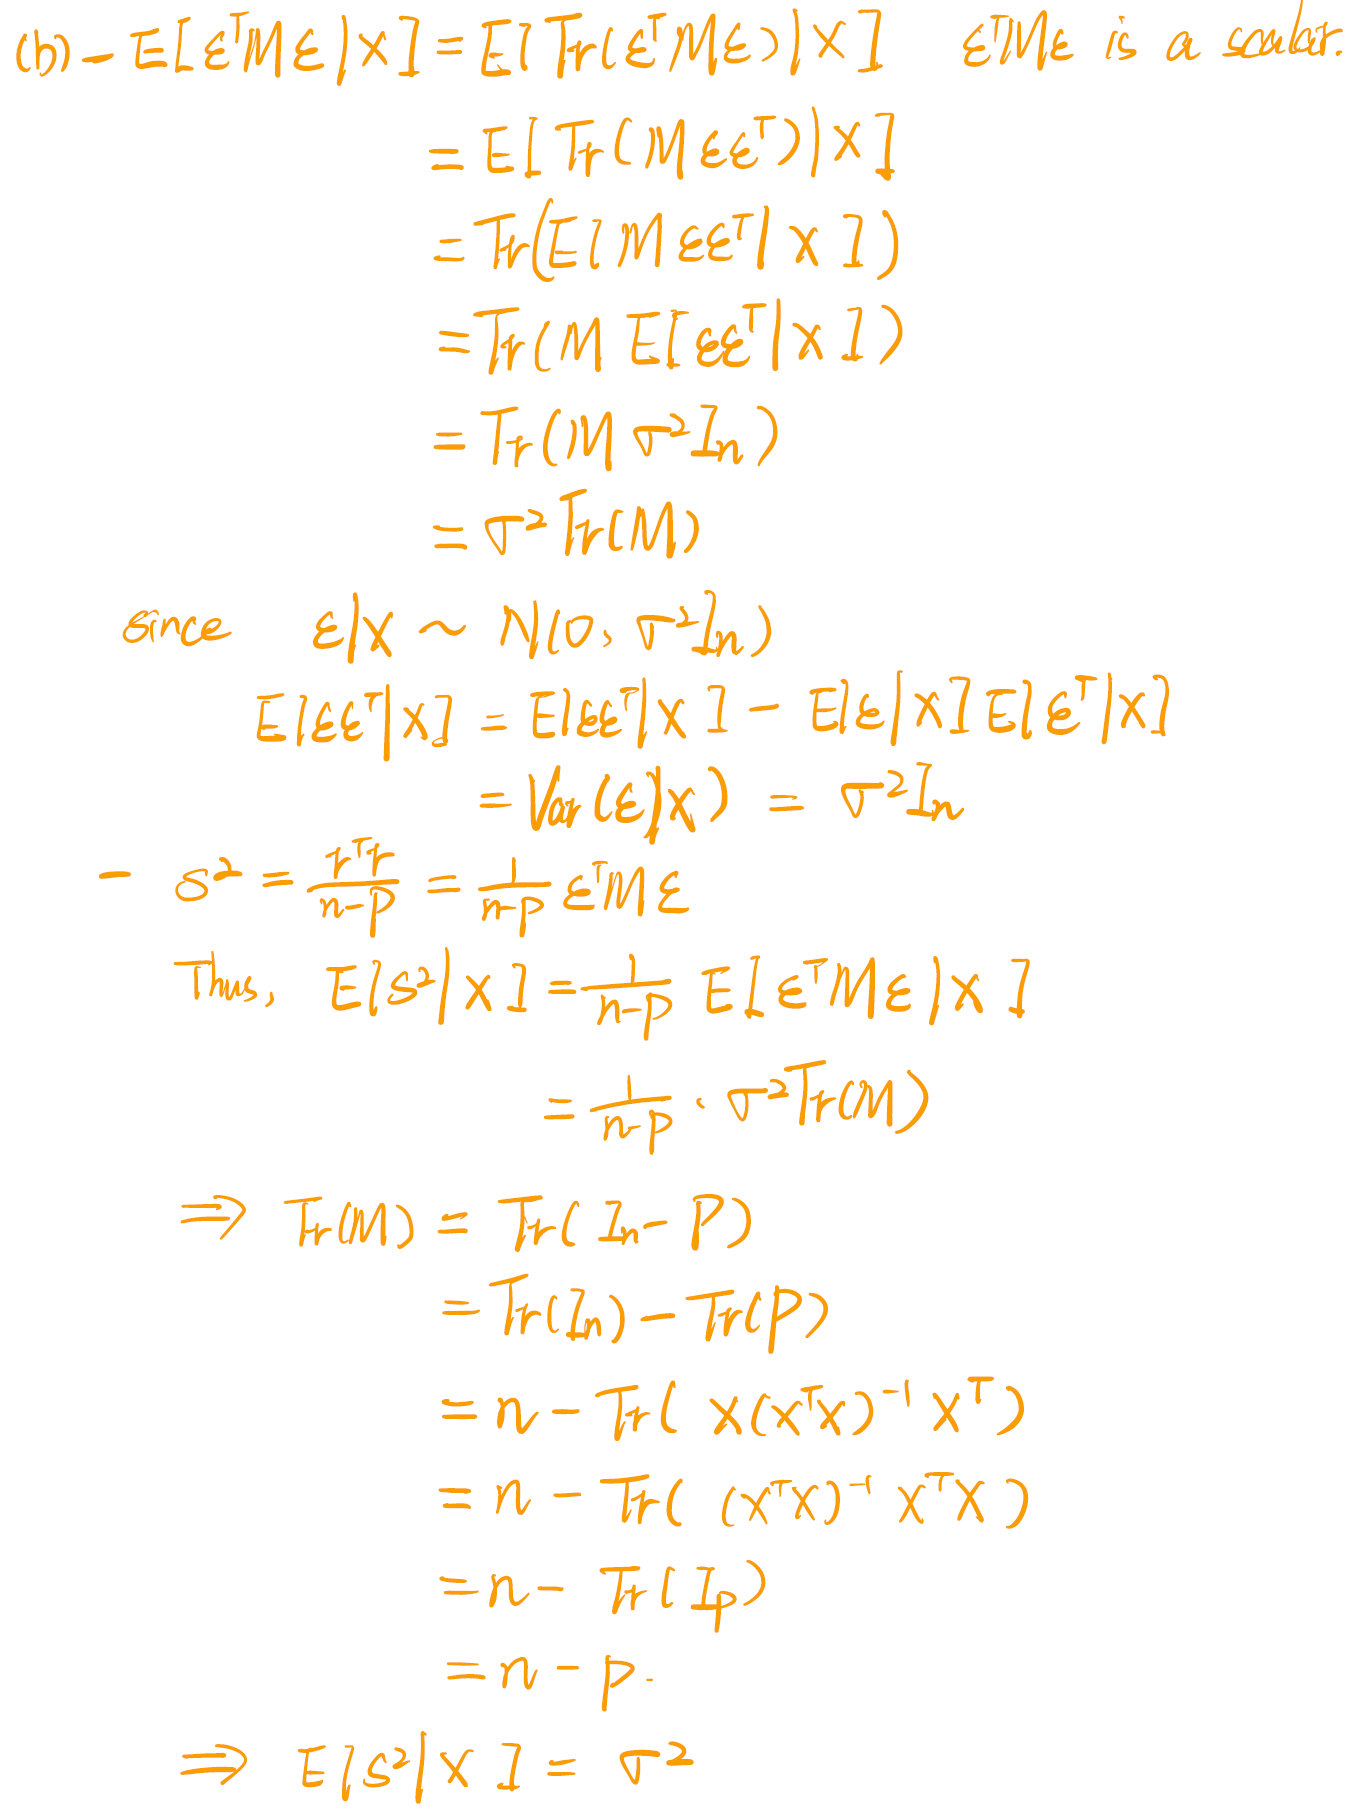

##### (c) Monte-Carlo Experiment

In [19]:
### 1
np.random.seed(99)
### Fix n, p, sigma (std), beta, K (Monte-Carlo times)
n, p, std, K = 50, 5, 1.5, 1000
beta = np.array([0.2, 0.4, 0.5, 0.6, 0.8])

### Generate a sample
X = np.random.normal(0, 1, (n, p))

### Calculate A, P, M, as shown in Q2(b)1
A = np.linalg.solve(X.T @ X, X.T)
P = X @ A
M = np.eye(n) - P

### Initiate two lists of s^2 and estimated s^2
s2, s2Tilde = np.zeros(K), np.zeros(K)

for k in range(K):
    eps = np.random.normal(0, std, n)
    y = X @ beta + eps
    betaEst = A @ y

    r = y - X @ betaEst
    r2 = r @ r
    s2[k] = r2 / (n - p)
    s2Tilde[k] = r2 / n

### Outcome Display
print('=' * 45)
print(f'Mean of s^2: {s2.mean():.4f} v.s. True Variance: {std ** 2}')
print('=' * 45)
print(f'Mean of (sTilde)^2: {s2Tilde.mean():.4f} v.s. True Variance: {std ** 2}')
print('=' * 45)
print(f'Bias of s^2: {s2.mean() - std ** 2:.4f}')
print('=' * 45)
print(f'Bias of (sTilde)^2: {s2Tilde.mean() - std ** 2:.4f}')
print('=' * 45)

Mean of s^2: 2.2590 v.s. True Variance: 2.25
Mean of (sTilde)^2: 2.0331 v.s. True Variance: 2.25
Bias of s^2: 0.0090
Bias of (sTilde)^2: -0.2169


### Q4 Chi-square quadratic forms from idempotent matrices.

##### Statement:
##### Let $\bm{z}$ be a random vector, following the distribution $N(\bm{0}, \bm{I}_{n})$. Let $\bm{A}_{n\times n}$ be a symmetric idepotent matrix with rank $k \leq n$. Then, $$\bm{z}^{\top}\bm{A}\bm{z}∼\chi^{2}_{k},$$ where $k = trace(A)$.

In [23]:
### (a)
np.random.seed(99)
n, p = 50, 5

X = np.random.normal(0, 1, (n, p))

### Evaluate A, P, M
A = np.linalg.solve(X.T @ X, X.T)
P = X @ A
M = np.eye(n) - P

trM = np.trace(M)

### Verify M is symmetric and idepotent.
def check_equality(A, B, tol = 1e-6):
    if A.shape != B.shape:
        print('Dimension Mismatch')
        return None
    maxAbs = np.max(np.abs(A - B))
    return  maxAbs <= tol, maxAbs

### Check
MSym, maxAbsChi1 = check_equality(M, M.T)
MIde, maxAbsChi2 = check_equality(M, M @ M)

print('=' * 45)
print(f"M = M^T: {MSym}: Max Absolute Deviation: {maxAbsChi1:.4e}")
print('=' * 45)
print(f"M = MM: {MIde}: Max Absolute Deviation: {maxAbsChi2:.4e}")
print('=' * 45)
print(f"Tr(M) = {trM:.2f} v.s. n - p = {n - p}.")
print('=' * 45)

M = M^T: True: Max Absolute Deviation: 5.5511e-17
M = MM: True: Max Absolute Deviation: 5.5511e-16
Tr(M) = 45.00 v.s. n - p = 45.


In [21]:
### (b)
B = 500
q = np.zeros(B)

### Calculate q for B times
for b in range(B):
    z = np.random.normal(0, 1, n)
    q[b] = z @ M @ z

### Calculate the estimated mean and variance
qMean = q.mean()
qVar = q.var()

qMean_absErr = abs(qMean - trM)
qMean_relErr = qMean_absErr/trM

qVar_absErr = abs(qVar - 2 * trM)
qVar_relErr = qVar_absErr/(2 * trM)

### trM is calculated in (a)
### Outcome Display
print('=' * 45)
print(f"Estimated Mean of q: {qMean:.4f} v.s. Tr(M): {trM:.4f}")
print(f"Absolute Error: {qMean_absErr:.4f}; Relative Error: {qMean_relErr:.4f}")
print('=' * 45)
print(f"Estimated Variance of q: {qVar:.4f} v.s. 2Tr(M): {2 * trM:.4f}")
print(f"Absolute Error: {qVar_absErr:.4f}; Relative Error: {qVar_relErr:.4f}")
print('=' * 45)

Estimated Mean of q: 45.4007 v.s. Tr(M): 45.0000
Absolute Error: 0.4007; Relative Error: 0.0089
Estimated Variance of q: 90.2572 v.s. 2Tr(M): 90.0000
Absolute Error: 0.2572; Relative Error: 0.0029
